In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import os
import numpy as np

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 3})

In [3]:
sns.set(style="whitegrid")

In [4]:
foldername = '100Y24HR'
code_dir = os.getcwd()
file_dir = code_dir + '/' + foldername
file_list = [f for f in os.listdir(file_dir) if f.endswith('.csv')]
file_list

['Basin1.csv',
 'Basin10.csv',
 'Basin11.csv',
 'Basin12.csv',
 'Basin13.csv',
 'Basin14.csv',
 'Basin15.csv',
 'Basin16.csv',
 'Basin2.csv',
 'Basin3.csv',
 'Basin4.csv',
 'Basin5.csv',
 'Basin6.csv',
 'Basin7.csv',
 'Basin8.csv',
 'Basin9.csv']

In [5]:
df_test = pd.read_csv(file_dir + '/'+ file_list[0])
df_test.head()

,Date,Time,Precip (IN),Loss(IN),Excess(IN),DirectFlow(CFS),Baseflow(CFS),TotalFlow(CFS)
0,15-Jun-20,0:00,,,,0.0,0,0.0
1,15-Jun-20,0:05,0.01,0,0.01,0.1,0,0.1
2,15-Jun-20,0:10,0.01,0,0.01,0.2,0,0.2
3,15-Jun-20,0:15,0.01,0,0.01,0.5,0,0.5
4,15-Jun-20,0:20,0.01,0,0.01,1.0,0,1.0


In [6]:
# col_var = [i.split('.')[0] for i in file_list]
# col_var.append('Time')
col_var = ['Time', 'Precip (IN)','Basin1','Basin2','Basin3','Basin4','Basin5','Basin6',
          'Basin7','Basin8','Basin9','Basin10','Basin11','Basin12','Basin13','Basin14','Basin15','Basin16'
          ]

Note change the time intervel 5 minute to 60 minute for Hurricane Harvey

In [7]:
ti = 5
df_res = pd.DataFrame(columns = col_var)
for f in file_list:
    df = pd.read_csv(file_dir + '/'+ f)
    df = df.dropna()
    df_res[f.split('.')[0]] = [i for i in df['TotalFlow(CFS)']]
df_res['Time'] = [i*ti/60 for i in range(len(df))]
df_res.head()   

,Time,Precip (IN),Basin1,Basin2,Basin3,Basin4,Basin5,Basin6,Basin7,Basin8,Basin9,Basin10,Basin11,Basin12,Basin13,Basin14,Basin15,Basin16
0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.083333,NaN,0.1,0.0,0.2,0.1,0.1,0.0,0.1,0.1,0.0,0.2,0.6,0.1,0.1,0.1,0.7,0.1
2,0.166667,NaN,0.2,0.1,0.8,0.3,0.6,0.1,0.3,0.5,0.2,0.9,2.3,0.4,0.3,0.2,2.5,0.3
3,0.250000,NaN,0.5,0.3,2.0,0.8,1.5,0.2,0.8,1.2,0.4,2.2,5.9,0.9,0.6,0.5,4.1,0.8
4,0.333333,NaN,1.0,0.6,4.0,1.5,3.0,0.3,1.5,2.5,0.8,4.3,11.3,1.8,1.3,1.0,4.9,1.5


In [8]:
df_res['Precip (IN)'] = [i.replace(" ","") for i in df['Precip (IN)']]
df_res['Precip (IN)'] = df_res['Precip (IN)'].apply(lambda x: 0 if x == ' ' else x)
df_res = df_res.replace(r'^\s*$', np.nan, regex=True)

In [9]:
df_table = df_res.copy()
for n in range(len(file_list)):
    df_table['V'+str(n+1)] = [sum(df_table['Basin'+str(n+1)][:i])*ti*60/1000000 for i in range(len(df_table))]
df_table.head()
df_table.describe()

,Time,Basin1,Basin2,Basin3,Basin4,Basin5,Basin6,Basin7,Basin8,Basin9,...,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,...,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,24.000000,150.872964,658.945754,98.308666,31.681456,171.510225,236.658406,63.280243,55.506932,232.015251,...,7.951395,7.009057,28.345102,47.860123,19.181430,12.719924,3.434671,51.624548,2.571721,3.043388
std,13.892486,357.371926,1270.495127,267.216252,87.125619,437.965161,474.950816,165.617523,151.747810,510.503768,...,4.387239,3.831439,16.428422,26.799010,10.429987,7.070983,1.877261,30.292986,1.370631,1.655829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.660580,2.496150,7.216560,14.668020,7.159140,4.071030,1.231110,12.334080,1.181250,1.122720
50%,24.000000,26.200000,118.200000,15.900000,5.300000,28.200000,41.900000,10.600000,9.400000,40.000000,...,10.863330,9.545430,39.408990,65.723730,26.074410,17.422140,4.676970,72.100440,3.472980,4.138080
75%,36.000000,119.100000,591.000000,76.400000,24.500000,134.500000,205.200000,49.300000,43.000000,187.400000,...,10.953810,9.608250,40.161840,66.464370,26.213070,17.587200,4.706730,73.706940,3.480720,4.161780
max,48.000000,2221.000000,5783.100000,2122.500000,708.700000,3125.900000,2284.500000,1234.500000,1217.900000,2825.200000,...,10.953810,9.608250,40.161840,66.464370,26.213070,17.587200,4.706730,73.706940,3.480720,4.161780


In [10]:
df_table.tail()

,Time,Precip (IN),Basin1,Basin2,Basin3,Basin4,Basin5,Basin6,Basin7,Basin8,...,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
572,47.666667,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.95381,9.60825,40.16184,66.46437,26.21307,17.5872,4.70673,73.70694,3.48072,4.16178
573,47.750000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.95381,9.60825,40.16184,66.46437,26.21307,17.5872,4.70673,73.70694,3.48072,4.16178
574,47.833333,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.95381,9.60825,40.16184,66.46437,26.21307,17.5872,4.70673,73.70694,3.48072,4.16178
575,47.916667,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.95381,9.60825,40.16184,66.46437,26.21307,17.5872,4.70673,73.70694,3.48072,4.16178
576,48.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.95381,9.60825,40.16184,66.46437,26.21307,17.5872,4.70673,73.70694,3.48072,4.16178


In [11]:
rows_list = []
cols = ['Catchment','PeakFlow(CFS)','TotalVolumn(10^6gal)']
for n in range(len(file_list)):
    catchment = n + 1
    flow = df_table['Basin'+str(n+1)].max()
    vol = df_table['V'+str(n+1)].max()
    d = {"Catchment":catchment,"PeakFlow(CFS)":flow,"TotalVolumn(10^6gal)":vol}
    rows_list.append(d)
df_table_res = pd.DataFrame(rows_list)
df_table_res

,Catchment,PeakFlow(CFS),TotalVolumn(10^6gal)
0,1,2221.0,26.11611
1,2,5783.1,114.06351
2,3,2122.5,17.01723
3,4,708.7,5.48406
4,5,3125.9,29.68842
5,6,2284.5,40.96557
6,7,1234.5,10.95381
7,8,1217.9,9.60825
8,9,2825.2,40.16184
9,10,6333.0,66.46437


In [12]:
Harvey_Dates = ['08/24/2017', '08/25/2017','08/26/2017','08/27/2017','08/28/2017','08/29/2017','08/30/2017','08/31/2017']
name_legend = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16']

Text(0, 0.5, 'Total Flow (CFS)')

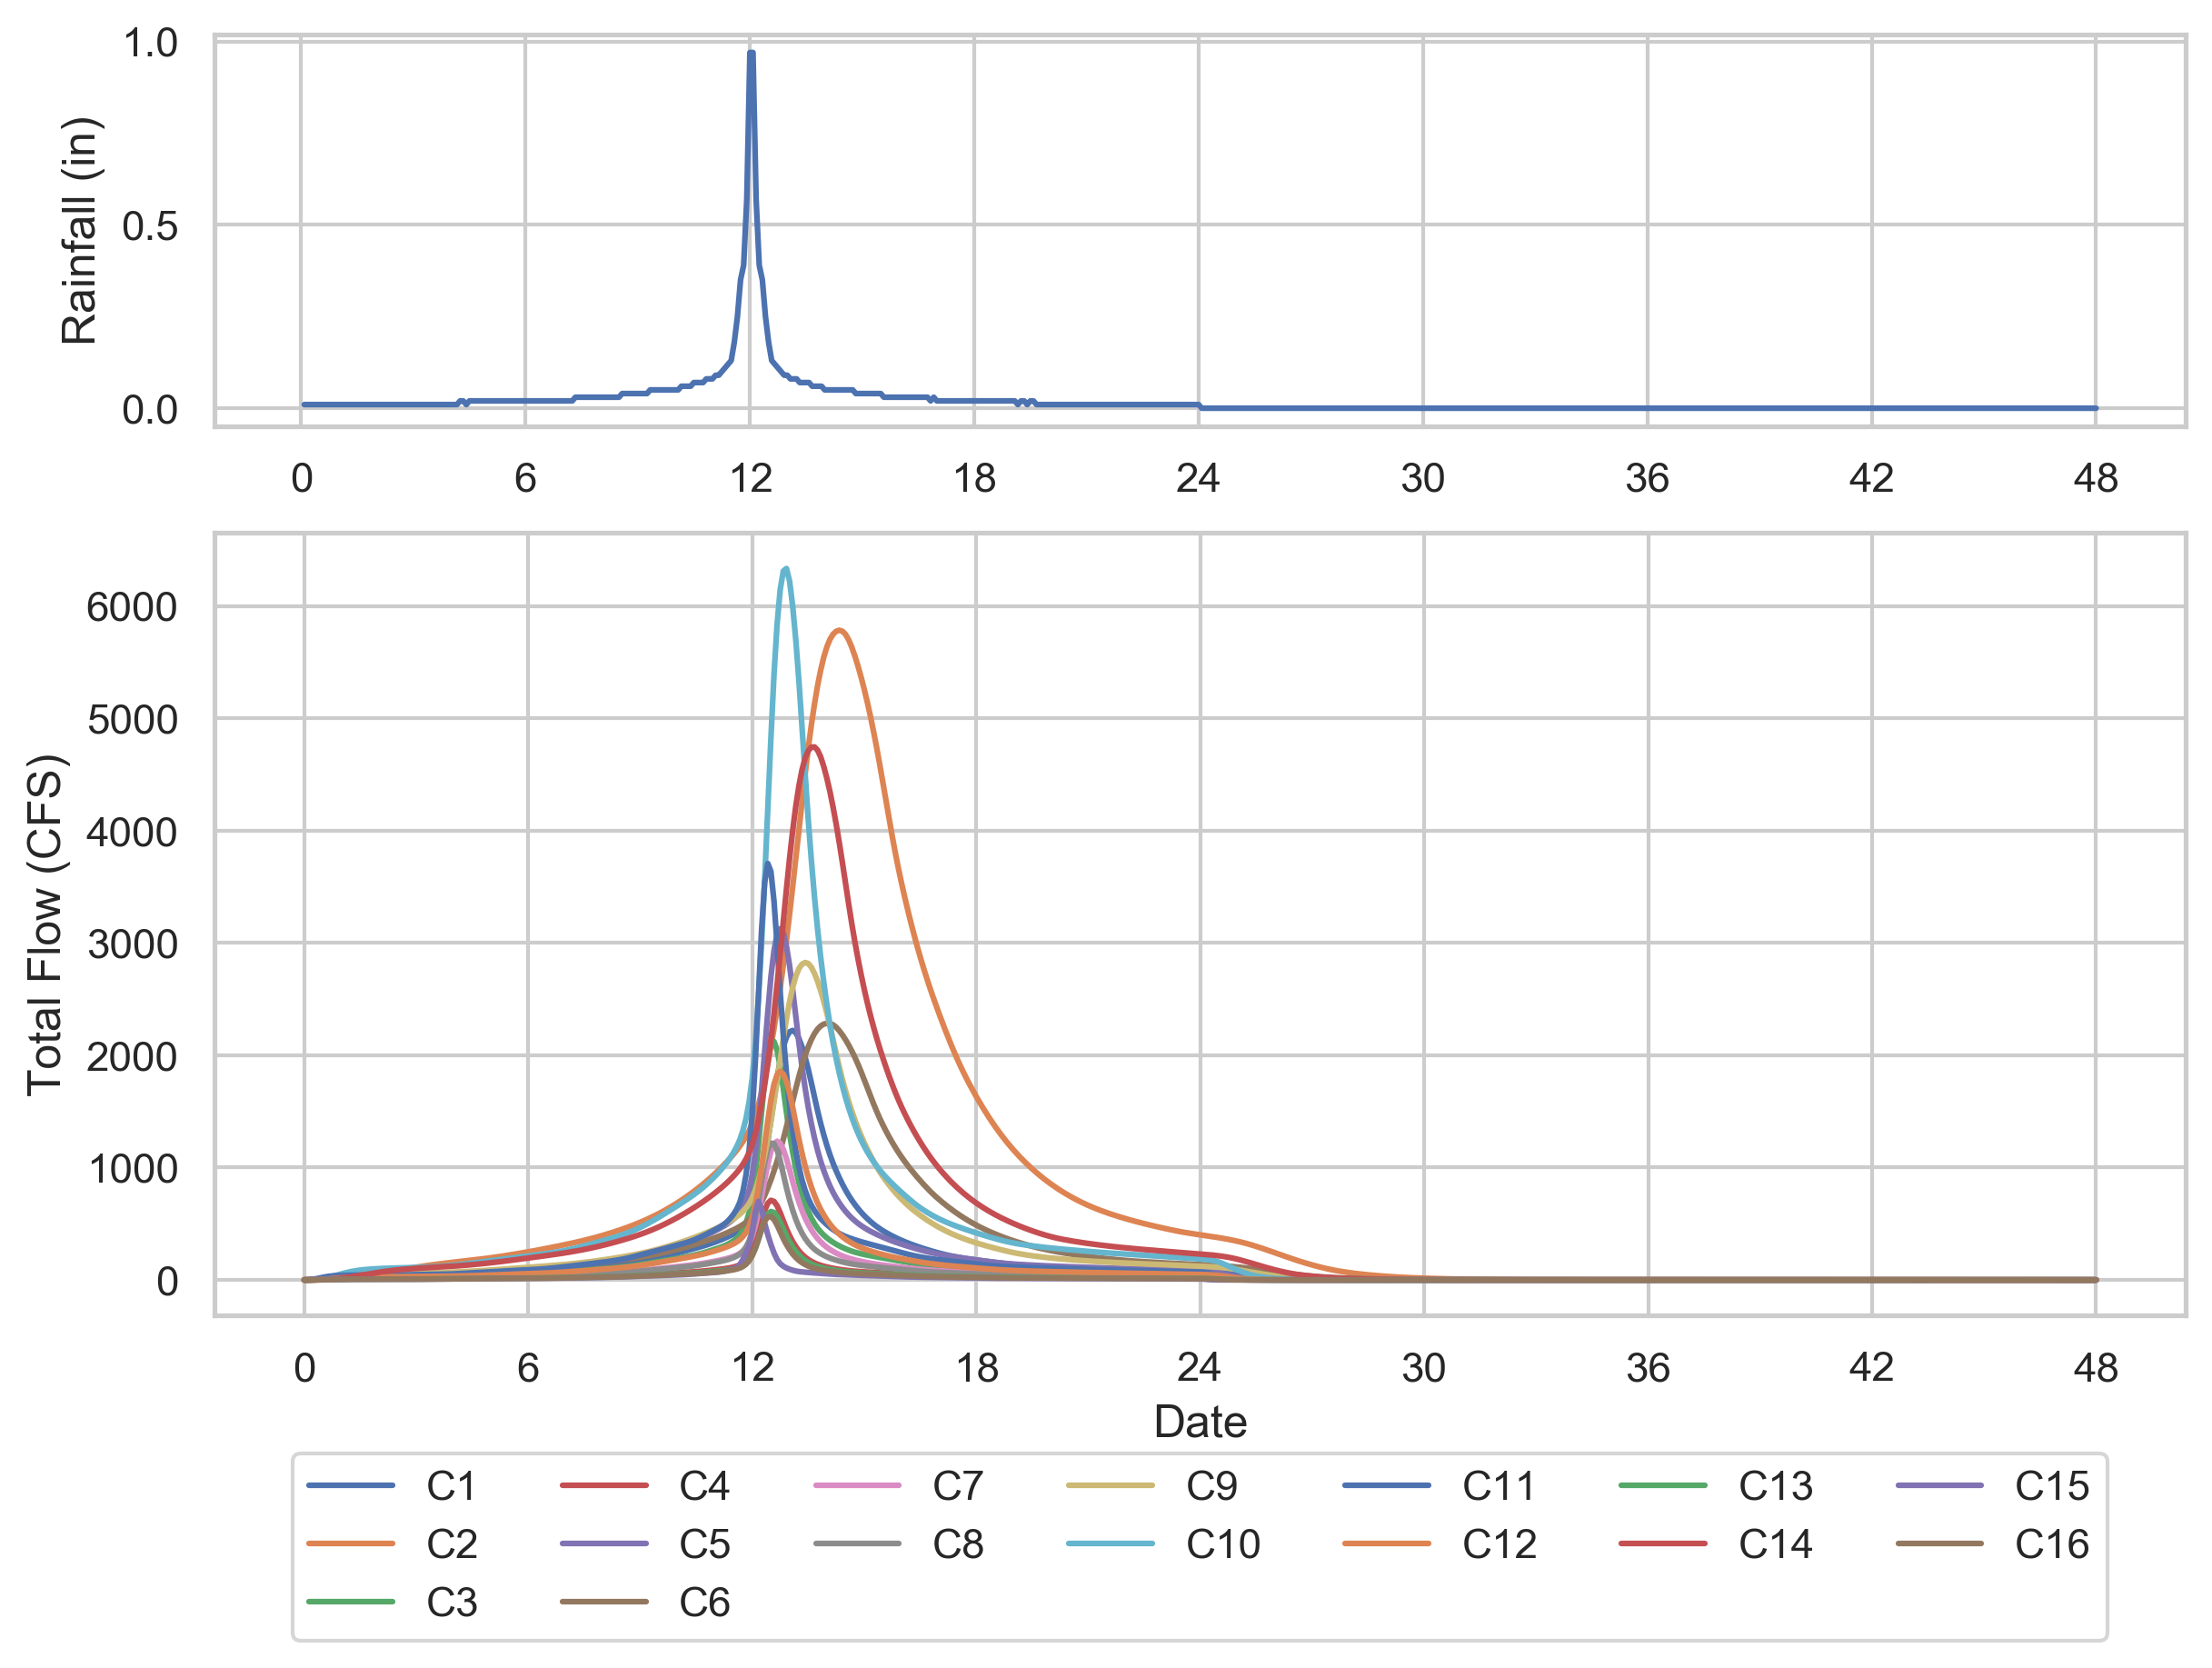

In [13]:
fig = plt.figure(constrained_layout=True, figsize = (8,6))
gs = gridspec.GridSpec(3, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
# ax1 = plt.subplot(211)
ax1.plot(df_res['Time'],df_res['Precip (IN)'])
# plt.xticks(np.arange(df_res['Time'].min(), df_res['Time'].max()+6, 24.0),Harvey_Dates )
plt.xticks(np.arange(df_res['Time'].min(), df_res['Time'].max()+6, 6.0))

plt.ylabel('Rainfall (in)')
# plt.yticks(np.arange(df_res['Precip (IN)'].min(), df_res['Precip (IN)'].max(), 0.2))
ax2 = fig.add_subplot(gs[1:3, :])
# ax2 = plt.subplot(212)
df_res.plot(x = 'Time', y = col_var[2:],ax =ax2)
# plt.legend(loc = 'center left',bbox_to_anchor=(1, 0.5))
plt.legend(name_legend,loc = 'upper center',ncol = 7,bbox_to_anchor=(0.5, -0.15))
# plt.xticks(np.arange(df_res['Time'].min(), df_res['Time'].max()+6, 24.0),Harvey_Dates )
plt.xticks(np.arange(df_res['Time'].min(), df_res['Time'].max()+6, 6.0))

plt.xlabel('Date')
plt.ylabel('Total Flow (CFS)')

In [14]:
df_res.to_csv(foldername + '.csv', header = True)
df_table_res.to_csv(foldername + '_table.csv', header = True)